In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.727490,0.653462,0.144049,0.157870,0.175612,0.190679,0.207408,0.231339,...,0.175895,0.064419,0.007436,0.000175,0.000000,0.000000,0.000000,0.000000,0.000000,0.769240
1,2,6.894754e-06,0.693188,0.630493,0.159680,0.175874,0.191860,0.207689,0.226977,0.256291,...,0.316394,0.281696,0.069380,0.000526,0.000000,0.000000,0.000000,0.000000,0.000000,0.766421
2,3,1.522987e-05,0.665530,0.586648,0.192249,0.208639,0.217749,0.237833,0.281123,0.314043,...,0.338544,0.185032,0.000381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.829077
3,4,2.800000e-05,0.647495,0.793099,0.184030,0.192450,0.194488,0.185085,0.159712,0.123396,...,0.000456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780966
4,5,4.366489e-05,0.633056,0.552397,0.234333,0.238546,0.254258,0.277161,0.290026,0.297756,...,0.302006,0.217059,0.041372,0.006455,0.000000,0.000000,0.000000,0.000000,0.000000,0.817671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.375256,0.423579,0.502443,0.514187,0.523659,0.531650,0.538673,0.544905,...,0.556687,0.562030,0.567562,0.573359,0.578606,0.582531,0.581873,0.573411,0.518698,0.908579
96,97,2.743041e-07,0.359204,0.424646,0.498837,0.510789,0.519941,0.527399,0.534295,0.540647,...,0.552020,0.557601,0.563144,0.568689,0.574410,0.578513,0.578275,0.569429,0.515904,0.907595
97,98,1.221970e-07,0.366519,0.426729,0.518045,0.529842,0.538992,0.546347,0.552896,0.558798,...,0.568999,0.573601,0.577293,0.580709,0.583086,0.582544,0.579153,0.568555,0.499163,0.912049
98,99,3.085853e-08,0.376080,0.426853,0.515834,0.527674,0.537103,0.544504,0.550997,0.556614,...,0.567203,0.572100,0.575973,0.578210,0.579356,0.578965,0.574289,0.561617,0.489814,0.911486


(0.3, 0.6)

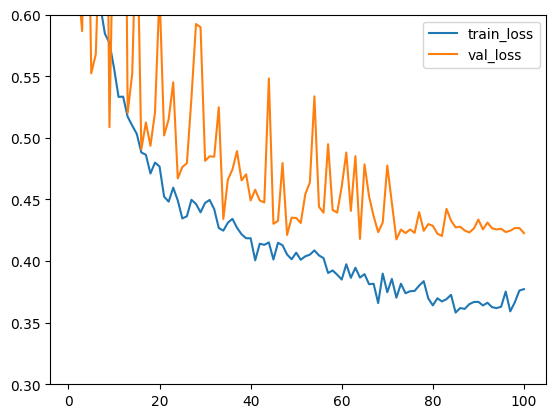

In [8]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

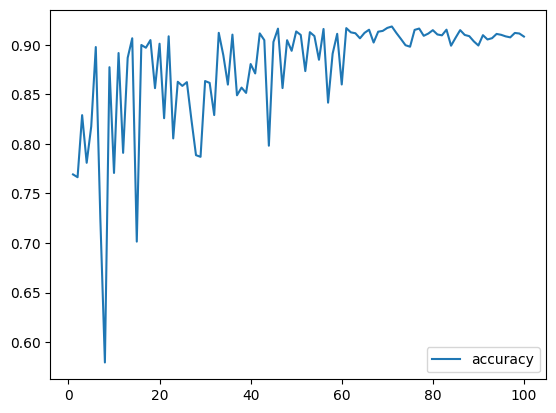

In [9]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

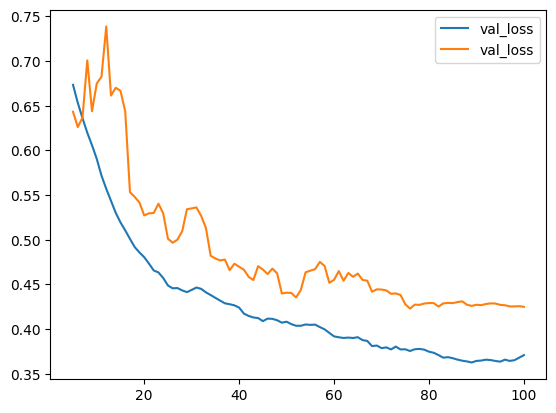

In [10]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)


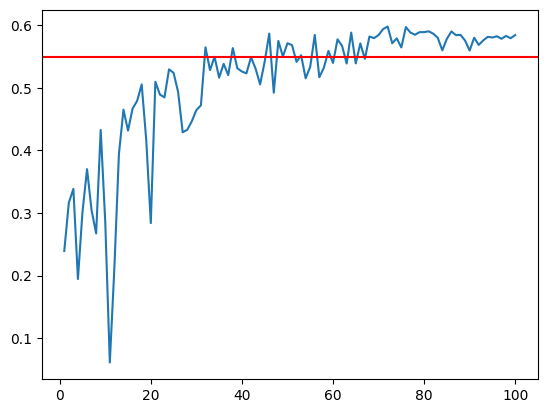

In [11]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.55, color='r', linestyle='-')


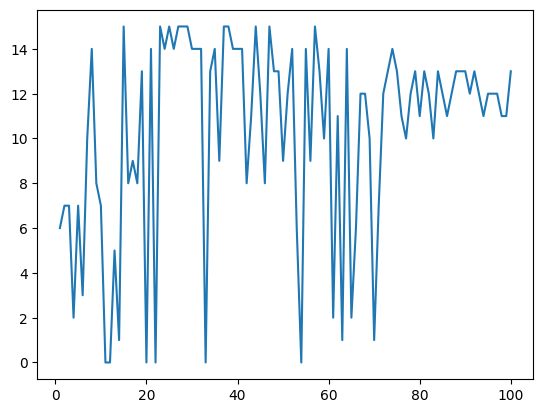

In [12]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")